In [ ]:
!pip install torch torchvision fastai==2.1.8


# Importação das ferramentas fornecidas pela fastai a serem utilizadas no desenvolvimento da rede neural

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from fastai.collab import *
from fastai.vision.all import *

In [ ]:
#Caminho do dataset proposto para o problema
path = Path("/content/drive/MyDrive/Colab Notebooks/brain_tumor_dataset")

# Criação do bloco de tados a interagir com a rede neural


In [ ]:
#Bloco de dados criado para classificar quais imagens tem tumor e quais não
#Eventualmente, será consumido pela rede neural
brainTumor = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    #Conjunto de imagens a ser estudado
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.05,seed=10),
    #Conjunto de rótulos a serem avaliados
    get_y=parent_label,
    item_tfms = Resize(128)
)

In [ ]:
#Carragamento dos dados oriundos do dataset
dataLoad = brainTumor.dataloaders(path)

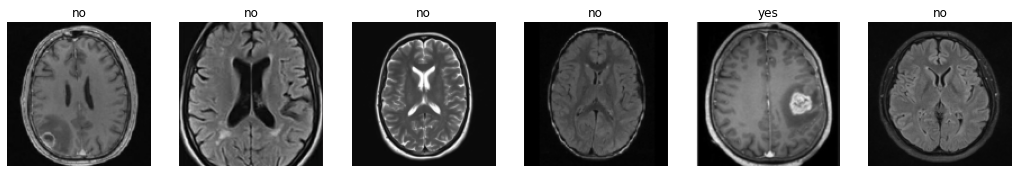

In [ ]:
dataLoad.valid.show_batch(max_n=6,nrows=1)

# Treinamento da Rede Neural Convolucional

In [ ]:
learn = cnn_learner(dataLoad, resnet18, metrics=error_rate)
#Quantidade de épocas a ser introduzida
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.284348,0.832120,0.333333,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.770285,0.727553,0.333333,00:16
1,0.670090,0.664379,0.250000,00:15
2,0.551522,0.654443,0.250000,00:16
3,0.456546,0.684887,0.166667,00:15
4,0.371286,0.594957,0.083333,00:16
5,0.318313,0.557095,0.166667,00:15


# Gráfico de classificação das imagens

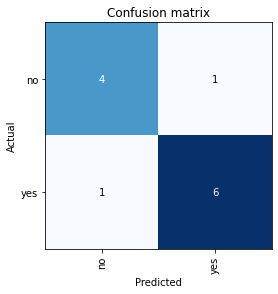

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Ilustração das analises desenvolvidas na rede

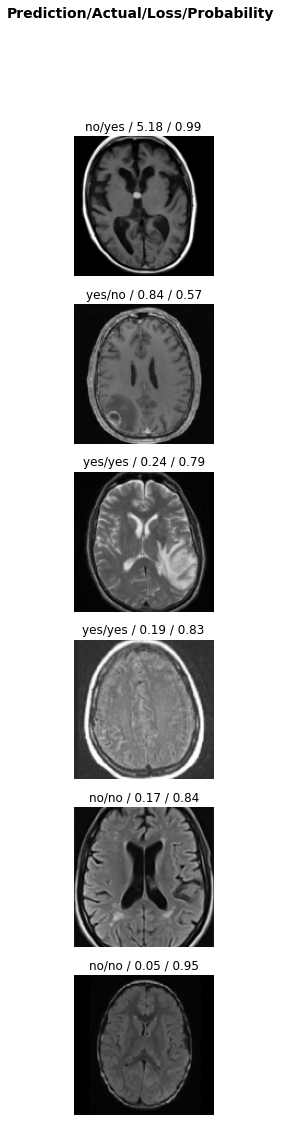

In [ ]:
interp.plot_top_losses(6,nrows=6)

Exportando a rede neural já treinada

In [ ]:
learn.export()

In [ ]:
imported_learner = load_learner(Path("export.pkl"))

Realizando testes com a rede neural para imagens selecionadas do dataset

In [42]:
test_image = Path("/content/drive/MyDrive/Colab Notebooks/brain_tumor_dataset/no/10 no.jpg")

In [43]:
imported_learner.predict(test_image)

('no', tensor(0), tensor([0.9804, 0.0196]))